## ML Assignment of Bike Sharing
### a) Import necessary packages


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### b) Loading and Understanding the Data

In [48]:
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [49]:
data.rename(columns={'dteday':'date','yr':'year','instant':'id', 'mnth':'month'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          730 non-null    int64  
 1   date        730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [50]:
for i in data.columns:
    print('#)',i)
    print(data[i].value_counts(), '\n'*2)

#) id
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: id, Length: 730, dtype: int64 


#) date
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: date, Length: 730, dtype: int64 


#) season
3    188
2    184
1    180
4    178
Name: season, dtype: int64 


#) year
0    365
1    365
Name: year, dtype: int64 


#) month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64 


#) holiday
0    709
1     21
Name: holiday, dtype: int64 


#) weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 


#) workingday
1    504
0    226
Name: workingday, dtype: int64 


#) weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64 


#) temp
26.035000    5
10.899153    5
27.880000  

### c) Preprocessing data
#### 1) we can see that casual and registered are combination of cnt variable so we can neglect casual and registered.
#### 2) The id column and date is not required for analysis so can remove those both.

In [51]:
not_req_columns=['casual', 'registered', 'id','date']
data.drop(not_req_columns, axis=1,inplace=True)
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


12 6 ['month', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


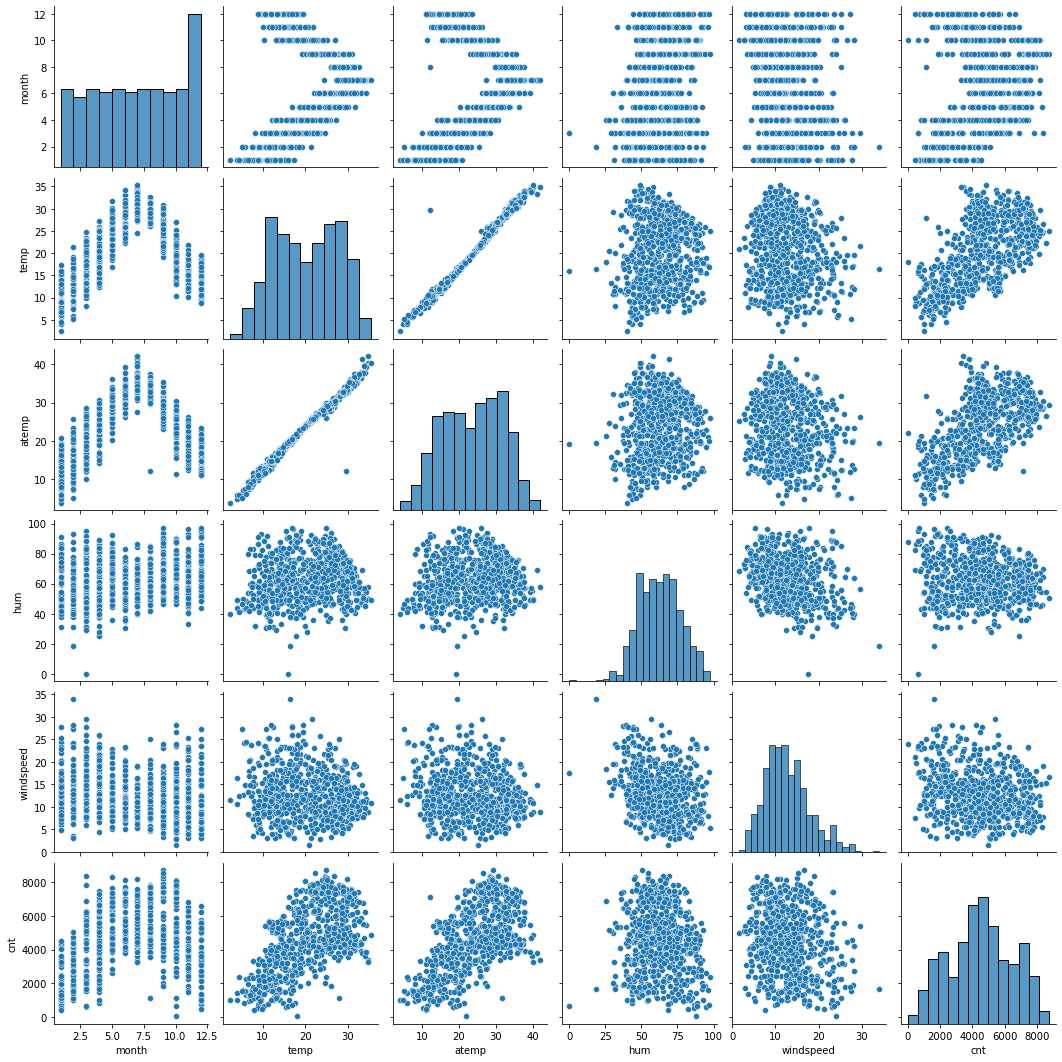

In [6]:
numeric=[]
for i in data.columns:
#     print(dict(data[i].value_counts()))
    if len(dict(data[i].value_counts()))>8 :
        numeric.append(i)
print(len(data.columns),len(numeric),numeric)
sns.pairplot(data[numeric])
plt.show()

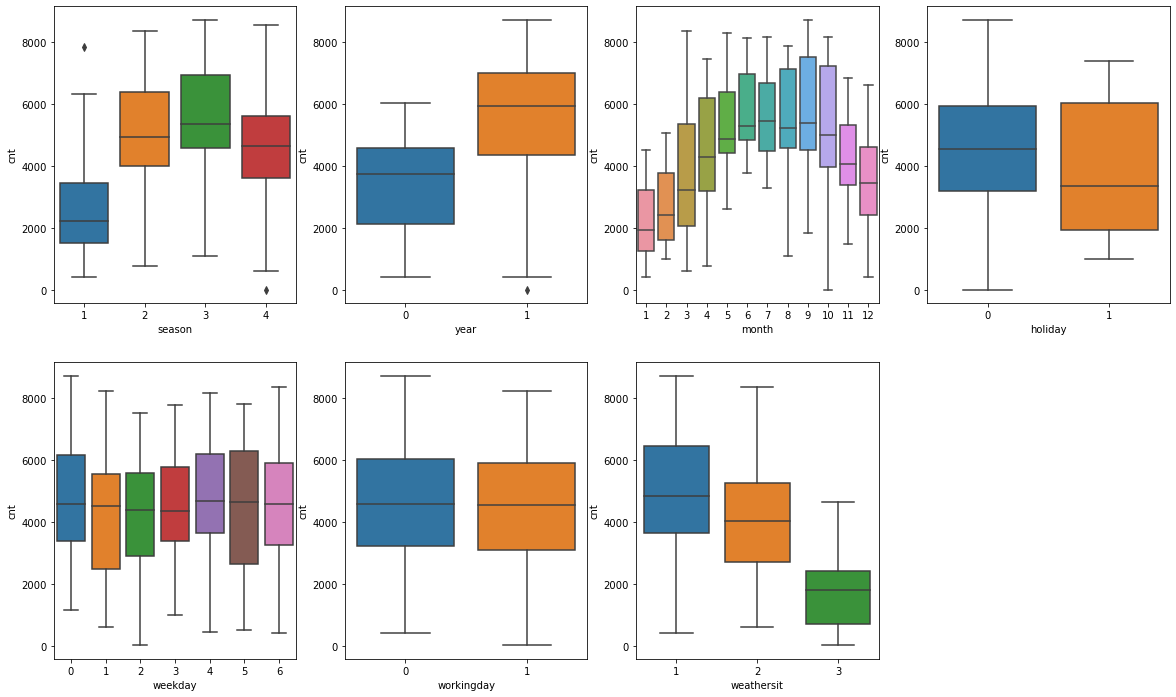

In [52]:
plt.figure(figsize=(20, 12))
c=1
for i in data.columns:
    if len(dict(data[i].value_counts()))<=12 :
        plt.subplot(2,4,c)
        sns.boxplot(x = i, y = 'cnt', data = data)
        c=c+1
plt.show()
# We can see there are no much outliers and no col with eqaully balanced so we can consider all columns for analysis

### e) Data Preparing

In [53]:
# we can see few categorical columns in data like Season, Weathersit, Weekday and Month
season = pd.get_dummies(data['season'])
season.head(100)

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
95,0,1,0,0
96,0,1,0,0
97,0,1,0,0
98,0,1,0,0


Now, you don't need four columns. You can drop the `season` column, where — 
- `100` will correspond to `spring`  1
- `010` will correspond to `summer`  2
- `001` will correspond to `fall`    3
- `000` will correspond to `winter`  4

In [54]:
# We use get_dummies by passing the series object as data and drop_first as True to avoid unnecesary columns.
season = pd.get_dummies(data['season'], drop_first = True)
data=pd.concat([data,season],axis=1)
# We can remove the actual one as we converted those all values into different columns
data.drop('season',axis=1,inplace=True)
data.head()

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3,4
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [55]:
data.rename(columns={2:'summer', 3:'fall', 4:'winter'}, inplace=True)
data.head(100)

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,4,0,5,1,1,16.024153,19.38040,47.0833,17.625221,2808,1,0,0
96,0,4,0,6,0,1,17.937500,21.68480,60.2917,10.874904,3141,1,0,0
97,0,4,0,0,0,2,13.769153,16.22395,83.6250,15.208464,1471,1,0,0
98,0,4,0,1,1,2,14.042500,17.07645,87.7500,8.916561,2455,1,0,0


In [56]:
weathersit=pd.get_dummies(data['weathersit'])
weathersit.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [57]:
weathersit=pd.get_dummies(data['weathersit'], drop_first=True)
data.drop('weathersit',axis=1,inplace=True)
data=pd.concat([data,weathersit],axis=1)
data.rename(columns={2:'mist', 3:'light'}, inplace=True)
data.head()

,year,month,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,mist,light
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [58]:
weekday=pd.get_dummies(data['weekday'], drop_first=True)
weekday.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [59]:
data.drop('weekday',axis=1,inplace=True)
data=pd.concat([data,weekday],axis=1)
data.rename(columns={1:'monday',2:'tuesday', 3:'wednesday',4:'thursday',5:'friday', 6:'saturday'}, inplace=True)
data.head()

,year,month,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,mist,light,monday,tuesday,wednesday,thursday,friday,saturday
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,1,0


In [60]:
data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
month=pd.get_dummies(data['month'], drop_first=True)
data=pd.concat([data,month],axis=1)
data.drop('month',axis=1,inplace=True)
data.head()


,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


### f) Splitting the Data into Train and Test data

In [61]:
from sklearn.model_selection import train_test_split

df_train, df_test=train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

#### g) Re-Scaling 

In [62]:
# To handle highly varying magnitudes or values or units. If feature scaling is not done,
# then a machine learning algorithm tends to weigh greater values, higher and consider smaller 
# values as the lower values, regardless of the unit of the values.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [63]:
# The numerical colums
cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[cols]=scaler.fit_transform(df_train[cols])
df_train.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train.describe()
# We can see that the all values of each column are scaled to one format

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


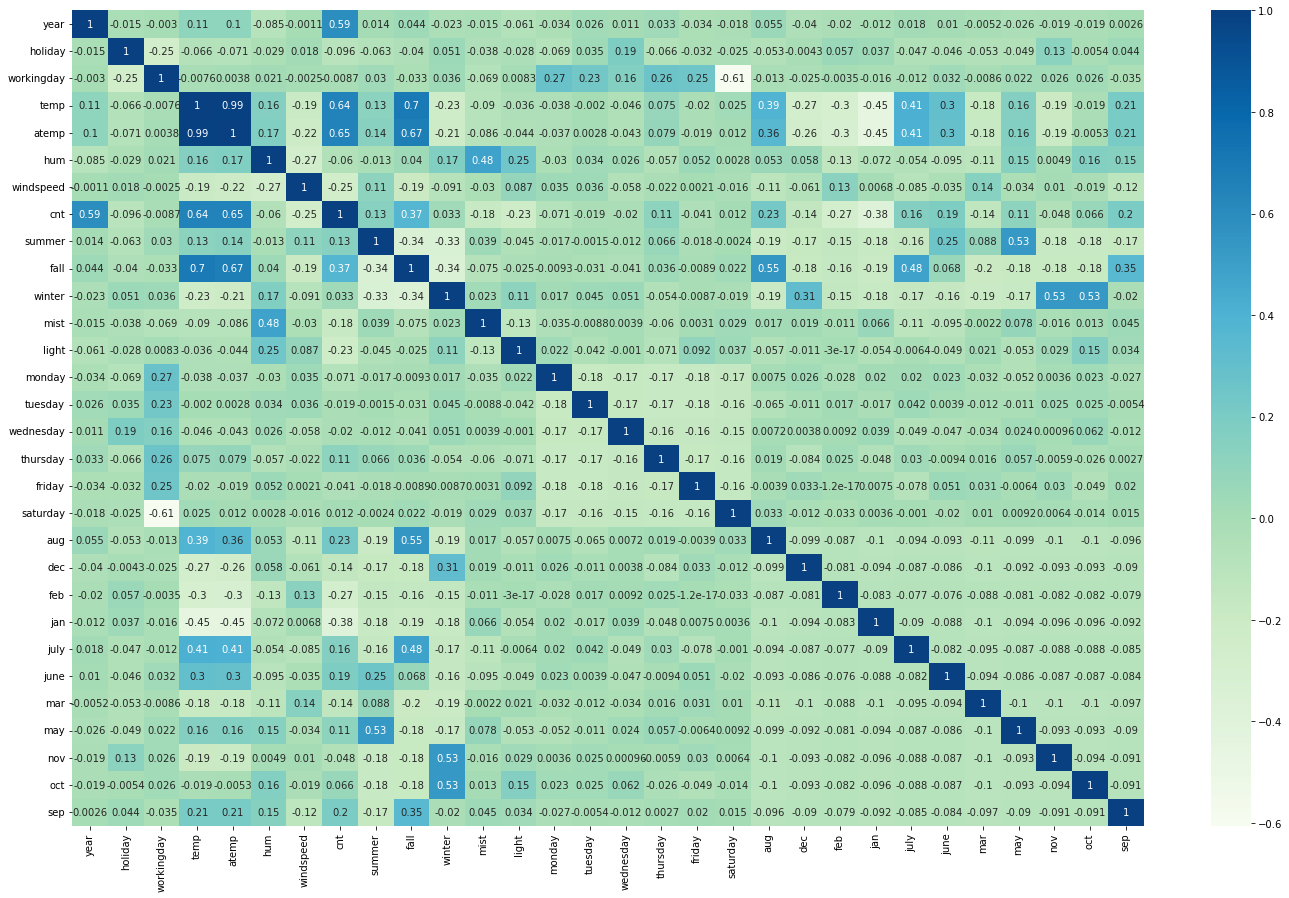

In [64]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="GnBu")
plt.show()

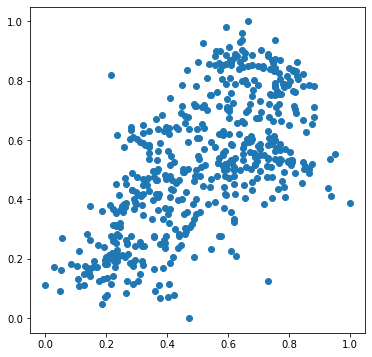

In [21]:
# we can see that cnt has more correlation with atemp, temp, year, fall
# lets first check with atemp which is more corelated
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### h) split of X and y

In [65]:
# from the plot we can fit the model with atemp
y_train=df_train.pop('cnt')
X_train = df_train

### i) RFE and LinearRegression

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('mist', False, 3),
 ('light', True, 1),
 ('monday', False, 13),
 ('tuesday', False, 14),
 ('wednesday', False, 12),
 ('thursday', False, 10),
 ('friday', False, 11),
 ('saturday', False, 17),
 ('aug', False, 16),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 19),
 ('mar', False, 20),
 ('may', False, 15),
 ('nov', False, 5),
 ('oct', False, 18),
 ('sep', True, 1)]

In [68]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter',
       'light', 'july', 'sep'],
      dtype='object')

### i) Build The Model

In [69]:
# Here is the place where we train and ready the model
import statsmodels.api as sm
X_train_rfe = X_train[col]
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

lr = sm.OLS(y_train, X_train_lm).fit()

In [70]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

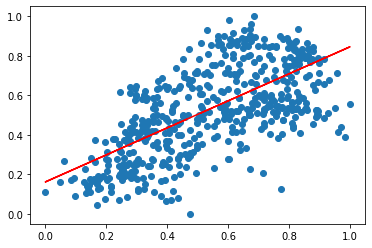

In [71]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.162 + 0.683*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [72]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           5.80e-61
Time:                        12:55:41   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [30]:
# We can see that r2 is 0.41 which is good one, now lets we add another feature 'temp'
X_train_lm = sm.add_constant(X_train[['temp', 'fall']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           8.59e-62
Time:                        12:44:16   Log-Likelihood:                 179.95
No. Observations:                 510   AIC:                            -353.9
Df Residuals:                     507   BIC:                            -341.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1339      0.022      5.951      0.000       0.090       0.178
temp           0.7443      0.047     15.936      0.000       0.653       0.836
fall          -0.0767      0.024     -3.204      0.001      -0.124      -0.030
==============================================================================
Omnibus:                        5.948   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.275
Skew:                           0.082   Prob(JB):                        0.118
Kurtosis:                       2.583   Cond. No.                         8.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# we can see that only 0.02 raise in r2 after adding temp, now lets add 'fall'
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           9.52e-65
Time:                        12:44:16   Log-Likelihood:                 189.60
No. Observations:                 510   AIC:                            -371.2
Df Residuals:                     506   BIC:                            -354.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2077      0.028      7.497      0.000       0.153       0.262
temp           0.7294      0.046     15.856      0.000       0.639       0.820
fall          -0.0862      0.024     -3.650      0.000      -0.133      -0.040
windspeed     -0.1974      0.045     -4.417      0.000      -0.285      -0.110
==============================================================================
Omnibus:                       11.467   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.505
Skew:                           0.150   Prob(JB):                       0.0235
Kurtosis:                       2.488   Cond. No.                         9.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'summer']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     102.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.21e-63
Time:                        12:44:17   Log-Likelihood:                 189.60
No. Observations:                 510   AIC:                            -369.2
Df Residuals:                     505   BIC:                            -348.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2080      0.029      7.238      0.000       0.152       0.265
temp           0.7281      0.055     13.267      0.000       0.620       0.836
fall          -0.0854      0.029     -2.898      0.004      -0.143      -0.028
windspeed     -0.1976      0.045     -4.393      0.000      -0.286      -0.109
summer         0.0010      0.022      0.044      0.965      -0.042       0.044
==============================================================================
Omnibus:                       11.522   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.535
Skew:                           0.151   Prob(JB):                       0.0231
Kurtosis:                       2.487   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# we can see that summer has high P value which is grater than 0.05 which is 0.965
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           9.20e-68
Time:                        12:44:17   Log-Likelihood:                 199.22
No. Observations:                 510   AIC:                            -388.4
Df Residuals:                     505   BIC:                            -367.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1689      0.029      5.903      0.000       0.113       0.225
temp           0.7301      0.045     16.158      0.000       0.641       0.819
fall          -0.0568      0.024     -2.354      0.019      -0.104      -0.009
windspeed     -0.1639      0.045     -3.677      0.000      -0.251      -0.076
winter         0.0802      0.018      4.407      0.000       0.044       0.116
==============================================================================
Omnibus:                        4.668   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.449
Skew:                           0.054   Prob(JB):                        0.178
Kurtosis:                       2.612   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# we can see that summer has high P value which is grater than 0.05 which is 0.965
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter', 'holiday']])

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     89.70
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.16e-67
Time:                        12:44:17   Log-Likelihood:                 200.82
No. Observations:                 510   AIC:                            -389.6
Df Residuals:                     504   BIC:                            -364.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1723      0.029      6.023      0.000       0.116       0.229
temp           0.7259      0.045     16.076      0.000       0.637       0.815
fall          -0.0560      0.024     -2.323      0.021      -0.103      -0.009
windspeed     -0.1628      0.044     -3.662      0.000      -0.250      -0.075
winter         0.0816      0.018      4.486      0.000       0.046       0.117
holiday       -0.0823      0.046     -1.778      0.076      -0.173       0.009
==============================================================================
Omnibus:                        4.608   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.396
Skew:                           0.048   Prob(JB):                        0.183
Kurtosis:                       2.612   Cond. No.                         9.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# holiday p value is higher than 0.05 which is 0.07 so remove 'holiday'
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# ['year', 'hum', 'mist', 'light', 'july', 'sep']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     291.0
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          5.01e-146
Time:                        12:44:17   Log-Likelihood:                 384.72
No. Observations:                 510   AIC:                            -757.4
Df Residuals:                     504   BIC:                            -732.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0895      0.020      4.433      0.000       0.050       0.129
temp           0.6510      0.032     20.587      0.000       0.589       0.713
fall          -0.0405      0.017     -2.412      0.016      -0.074      -0.008
windspeed     -0.1742      0.031     -5.616      0.000      -0.235      -0.113
winter         0.0821      0.013      6.483      0.000       0.057       0.107
year           0.2371      0.010     23.220      0.000       0.217       0.257
==============================================================================
Omnibus:                       68.899   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.240
Skew:                          -0.755   Prob(JB):                     7.87e-32
Kurtosis:                       5.113   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# holiday p value is higher than 0.05 which is 0.07 so remove 'holiday'
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year','hum']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# ['year', 'mist', 'light', 'july', 'sep']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     294.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.99e-161
Time:                        12:44:17   Log-Likelihood:                 422.77
No. Observations:                 510   AIC:                            -831.5
Df Residuals:                     503   BIC:                            -801.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2895      0.029      9.952      0.000       0.232       0.347
temp           0.6990      0.030     23.409      0.000       0.640       0.758
fall          -0.0517      0.016     -3.302      0.001      -0.083      -0.021
windspeed     -0.2353      0.030     -7.950      0.000      -0.293      -0.177
winter         0.0997      0.012      8.355      0.000       0.076       0.123
year           0.2278      0.010     23.875      0.000       0.209       0.247
hum           -0.3118      0.035     -8.996      0.000      -0.380      -0.244
==============================================================================
Omnibus:                       68.594   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.398
Skew:                          -0.733   Prob(JB):                     2.20e-33
Kurtosis:                       5.220   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'mist']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# [ 'light' ,'july', 'sep']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.53e-160
Time:                        12:44:17   Log-Likelihood:                 423.71
No. Observations:                 510   AIC:                            -831.4
Df Residuals:                     502   BIC:                            -797.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2789      0.030      9.274      0.000       0.220       0.338
temp           0.6919      0.030     22.854      0.000       0.632       0.751
fall          -0.0513      0.016     -3.276      0.001      -0.082      -0.021
windspeed     -0.2320      0.030     -7.820      0.000      -0.290      -0.174
winter         0.0979      0.012      8.158      0.000       0.074       0.121
year           0.2286      0.010     23.935      0.000       0.210       0.247
hum           -0.2831      0.041     -6.982      0.000      -0.363      -0.203
mist          -0.0159      0.012     -1.365      0.173      -0.039       0.007
==============================================================================
Omnibus:                       72.337   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.545
Skew:                          -0.755   Prob(JB):                     1.13e-36
Kurtosis:                       5.348   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# mist has P value of more than 0.05 which is 0.17 so we can neglect that mist
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'light']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# [ 'july', 'sep']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.42e-169
Time:                        12:44:17   Log-Likelihood:                 445.21
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     502   BIC:                            -840.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2480      0.029      8.697      0.000       0.192       0.304
temp           0.6867      0.029     23.960      0.000       0.630       0.743
fall          -0.0451      0.015     -3.001      0.003      -0.075      -0.016
windspeed     -0.2026      0.029     -7.045      0.000      -0.259      -0.146
winter         0.1065      0.011      9.285      0.000       0.084       0.129
year           0.2259      0.009     24.706      0.000       0.208       0.244
hum           -0.2493      0.034     -7.236      0.000      -0.317      -0.182
light         -0.1910      0.028     -6.795      0.000      -0.246      -0.136
==============================================================================
Omnibus:                       44.797   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.396
Skew:                          -0.526   Prob(JB):                     6.38e-20
Kurtosis:                       4.747   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'light', 'july']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# ['sep']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     260.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.76e-173
Time:                        12:59:36   Log-Likelihood:                 457.08
No. Observations:                 510   AIC:                            -896.2
Df Residuals:                     501   BIC:                            -858.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2524      0.028      9.045      0.000       0.198       0.307
temp           0.7070      0.028     24.951      0.000       0.651       0.763
fall          -0.0245      0.015     -1.599      0.111      -0.055       0.006
windspeed     -0.2044      0.028     -7.267      0.000      -0.260      -0.149
winter         0.1075      0.011      9.576      0.000       0.085       0.130
year           0.2246      0.009     25.111      0.000       0.207       0.242
hum           -0.2688      0.034     -7.922      0.000      -0.335      -0.202
light         -0.1858      0.028     -6.756      0.000      -0.240      -0.132
july          -0.0940      0.019     -4.887      0.000      -0.132      -0.056
==============================================================================
Omnibus:                       36.313   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.856
Skew:                          -0.465   Prob(JB):                     8.26e-15
Kurtosis:                       4.479   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'light', 'july','sep']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()
# []

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.05e-176
Time:                        13:00:18   Log-Likelihood:                 467.24
No. Observations:                 510   AIC:                            -914.5
Df Residuals:                     500   BIC:                            -872.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2590      0.027      9.444      0.000       0.205       0.313
temp           0.7116      0.028     25.578      0.000       0.657       0.766
fall          -0.0525      0.016     -3.230      0.001      -0.084      -0.021
windspeed     -0.2023      0.028     -7.330      0.000      -0.257      -0.148
winter         0.1029      0.011      9.310      0.000       0.081       0.125
year           0.2247      0.009     25.593      0.000       0.207       0.242
hum           -0.2838      0.033     -8.481      0.000      -0.350      -0.218
light         -0.1873      0.027     -6.939      0.000      -0.240      -0.134
july          -0.0677      0.020     -3.427      0.001      -0.107      -0.029
sep            0.0816      0.018      4.509      0.000       0.046       0.117
==============================================================================
Omnibus:                       40.976   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.529
Skew:                          -0.551   Prob(JB):                     3.58e-15
Kurtosis:                       4.385   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# The R2 value is 0.81 and Adj R2 value is 0.81 which is a good model

### j) VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.90
4,atemp,382.02
2,workingday,229.62
12,monday,50.79
13,tuesday,49.62
16,friday,48.16
15,thursday,47.10
14,wednesday,43.28
5,hum,36.98
8,fall,14.19


In [77]:
vif[vif['VIF']<5]

,Features,VIF
19,dec,4.39
21,jan,3.22
23,june,3.10
20,feb,2.59
25,may,2.45
24,mar,2.43
10,mist,2.38
0,year,2.14
17,saturday,1.90
11,light,1.31


#### k) Checking the Error terms which should be normally distributed

In [78]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

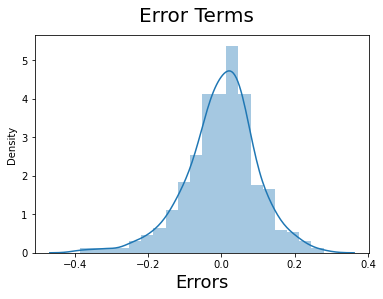

In [79]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### l) Making Predictions of Test Data

In [80]:
cols=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[cols]=scaler.fit_transform(df_test[cols])
df_test.head()

,year,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,dec,feb,jan,july,june,mar,may,nov,oct,sep
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
y_test=df_test.pop('cnt')
X_test=df_test[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'light', 'july','sep']]
X_test = sm.add_constant(X_test[[ 'temp', 'fall', 'windspeed', 'winter','year','hum', 'light', 'july','sep']])

In [82]:
y_pred = lr.predict(X_test)

#### m) Calculating R square and Adj R square

In [83]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.775671058250732

In [84]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7649


#### We can see that r2 and adj r2 are quite eqaul with small difference which implies its a good one

#### n) Plotting Y_test vs Y_pred

Text(0, 0.5, 'y_pred')

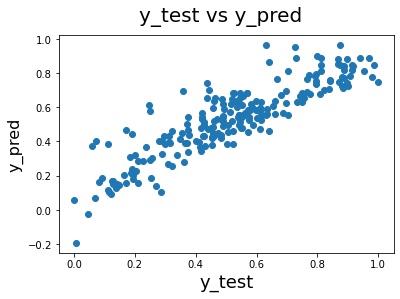

In [85]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0.5, 0, 'Index')

<Figure size 432x288 with 0 Axes>

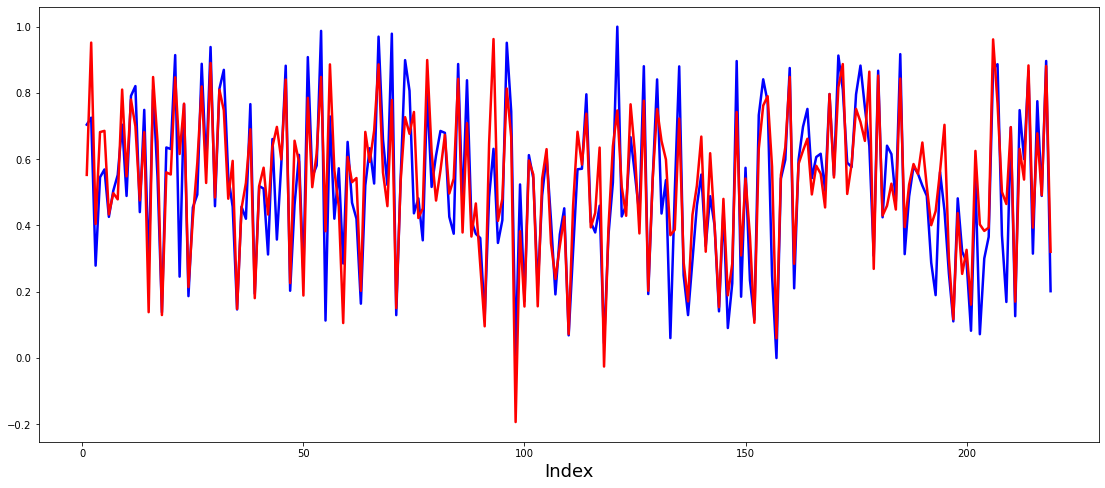

In [86]:
import matplotlib.pyplot as plt
c = [i for i in range(1,220,1)] # generating index
fig = plt.figure()
plt.figure(figsize=[19,8])
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 

#### We Can See The pred ones are mostly matching with test data.

### Demand of bikes depend on year, temp, fall, windspeed, light,summer and winter.